<div>
    <table style="border:2px solid white;" cellspacing="0" cellpadding="0" border-collapse: collapse; border-spacing: 0;>
      <tr> 
        <th style="background-color:white"> <img src="../media/ccal-logo-D3.png" width=225 height=225></th>
        <th style="background-color:white"> <img src="../media/logoMoores.jpg" width=175 height=175></th>
        <th style="background-color:white"> <img src="../media/GP.png" width=200 height=200></th>
        <th style="background-color:white"> <img src="../media/UCSD_School_of_Medicine_logo.png" width=175 height=175></th> 
        <th style="background-color:white"> <img src="../media/Broad.png" width=130 height=130></th> 
      </tr>
    </table>
</div>

<hr style="border: none; border-bottom: 3px solid #88BBEE;">

# **Onco-*GPS* Methodology**
## **Chapter 6. Displaying Genomic Features in the KRAS mutant Onco-*GPS* Map** 

**Authors:** William Kim$^{1}$, Huwate (Kwat) Yeerna$^{2}$, Taylor Cavazos$^{2}$, Kate Medetgul-Ernar$^{2}$, Clarence Mah$^{3}$, Stephanie Ting$^{2}$, Jason Park$^{2}$, Jill P. Mesirov$^{2, 3}$ and Pablo Tamayo$^{2,3}$.

**Date:** April 17, 2017

1. Eli and Edythe Broad Institute      
2. UCSD Moores Cancer Center
3. UCSD School of Medicine 

**Article:** [*Kim et al.* Decomposing Oncogenic Transcriptional Signatures to Generate Maps of Divergent Cellular States](https://drive.google.com/file/d/0B0MQqMWLrsA4b2RUTTAzNjFmVkk/view?usp=sharing)


**Analysis overview**  In this chapter we will display geneomic features in the KRAS mutant Onco-GPS map.

<div>
    <img src="../media/method_chap6.png" width=2144 height=1041>
</div>

This is one powerful feature of the Onco-GPS map where, once a group of samples have been projected onto it, they can be color-coded to represent specific sample, molecular features or phenotypes of interest. This allows a direct visual assessment of how each sample associates with specific features or biological phenotypes of interest, as well as e.g. enable tracking of dynamic changes in the cell state of individual samples. We can also use the Onco-GPS to support high-level probabilistic inferential models or networks to predict functional phenotypes such as sensitivity to genetic and pharmacological perturbations. In this notebook we will use the Onco-GPS to visualize the association of selected pathway, protein and gene expression vis a vis the S1-S4 oncogenic states.

Go to the [next chapter (7)](7 Defining Global Cellular States and Onco-GPS Map.ipynb).
Back to the [introduction chapter (0)](0 Introduction and Overview.ipynb).

<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 1. Set up notebook and import Computational Cancer Analysis Library ([CCAL](https://github.com/KwatME/ccal))

In [3]:
from environment import *

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<hr style="border: none; border-bottom: 3px solid #88BBEE;">
### 2. Read the feature datasets

In [2]:
mutation_df = ccal.read_gct('../data/ccle_mut_cna.gct')

In [3]:
gene_dependency_df = ccal.read_gct('../data/ccle_gene_dependency.gct')

In [4]:
gene_expression_df = ccal.read_gct('../data/ccle_gene_expression.gct')

In [5]:
pathway_expression_df = ccal.read_gct('../data/ccle_pathway_expression_all.gct')

In [6]:
regulator_df = ccal.read_gct('../data/ccle_regulator.gct')

In [7]:
protein_expression_df = ccal.read_gct('../data/ccle_protein_expression.gct')

In [8]:
tissue_df = ccal.read_gct('../data/ccle_tissue.gct')

In [9]:
drug_sensitivity_df = ccal.read_gct('../data/ccle_drug_sensitivity.gct')

### 3. Read and  select state labels

In [10]:
kras_mutants = mutation_df.columns[mutation_df.ix['KRAS_MUT', :].astype(bool)]

In [11]:
h_matrix = ccal.read_gct('../results/nmf_cc/nmf/nmf_k9_h.gct')

In [12]:
kras_mutant_h_matrix = h_matrix.ix[:, h_matrix.columns & kras_mutants]

In [13]:
kras_h_matrix = kras_mutant_h_matrix.ix[['C7', 'C2', 'C1'], :]

In [14]:
labels = ccal.read_gct('../results/clusterings/clusterings_k4.gct')

In [15]:
kras_sample_labels = labels.ix[4, :]

### 4. Display selected genomic features in the KRAS mut Onco-GPS map


#### 4.1 Display the enrichment scores for NFkB and ZEB1 targets onto the Onco-GPS map (These are Figs 6B-C in the article)

Onco-GPS for ZEB1 targets (red indicates higher relative expression and blue lower relative expression)

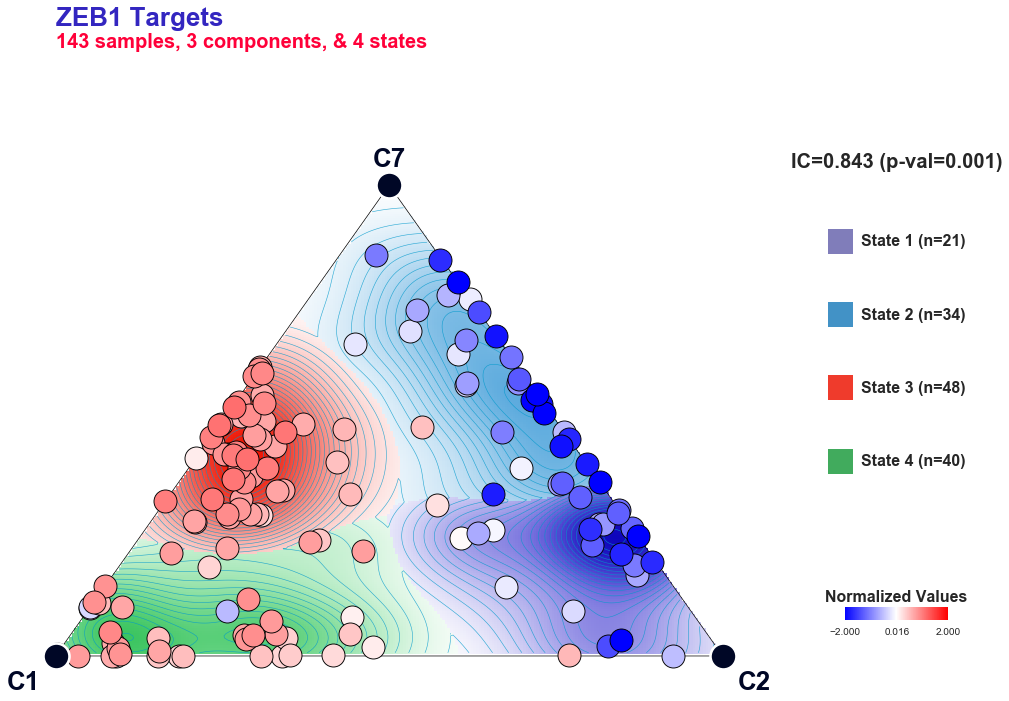

In [16]:
ccal.oncogps.make_oncogp(kras_h_matrix, 
                         kras_sample_labels, 
                         training_annotation=pathway_expression_df.ix['AIGNER_ZEB1_TARGETS', kras_h_matrix.columns],
                         title='ZEB1 Targets',
                         equilateral=True,
                         state_colors=[purple, blue, red, green],
                         power = 1.2,
                         kde_bandwidth_factor=0.75,
                         legend_markersize=25,
                         contour_linecolor=light_blue,
                         component_names=["C7","C2","C1"],
                         std_max=2)
                         #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for ZEB1 targets (higher values indicate higher relative expression)

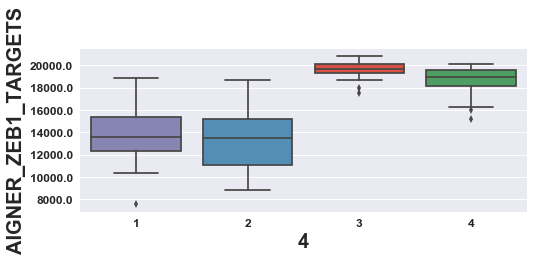

In [17]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            pathway_expression_df.ix['AIGNER_ZEB1_TARGETS', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for NFkB targets (red indicates higher relative expression and blue lower relative expression)

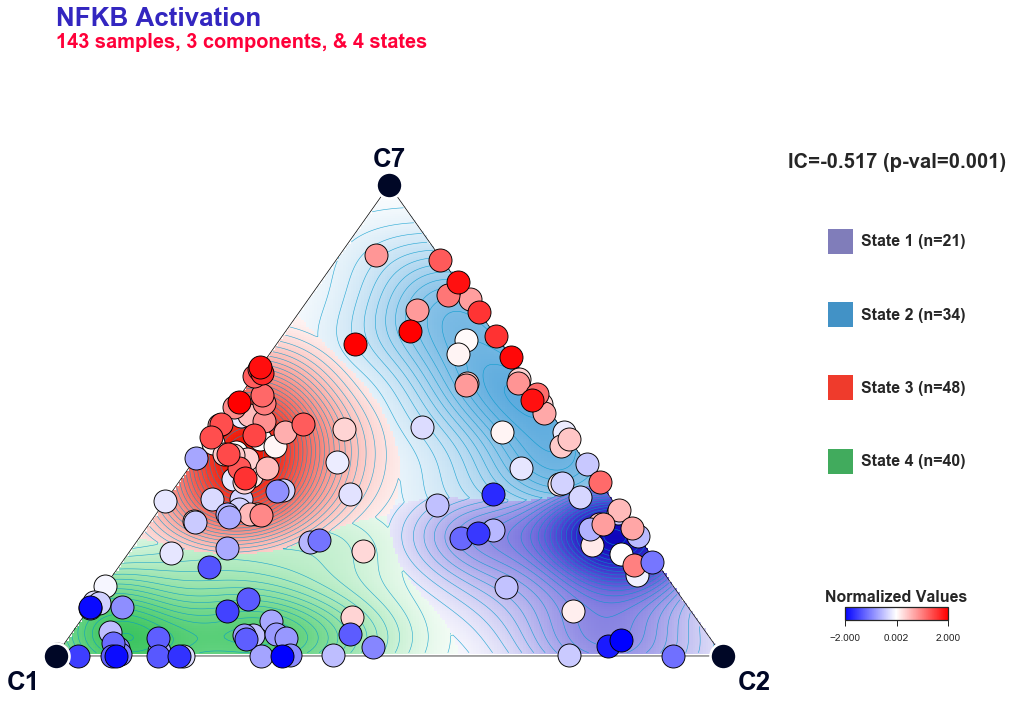

In [18]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=pathway_expression_df.ix['HINATA_NFKB_TARGETS_FIBROBLAST_UP', kras_h_matrix.columns],
                          title='NFKB Activation',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power = 1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for NFkB targets (higher values indicate higher relative expression)

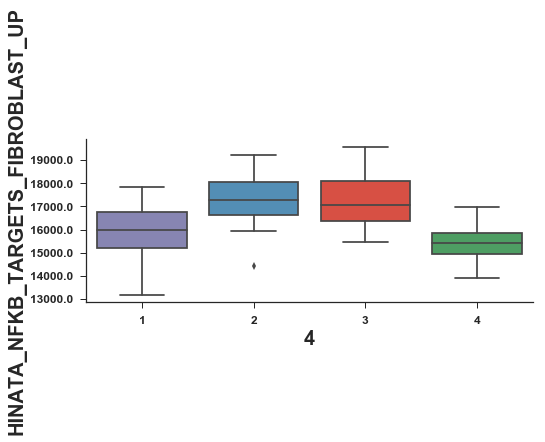

In [19]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            pathway_expression_df.ix['HINATA_NFKB_TARGETS_FIBROBLAST_UP', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

#### 4.2 Display selected tissue types

Onco-GPS for Lung Cancers (black indicates the sample is a Lung Cancer, gray a different tissue type)

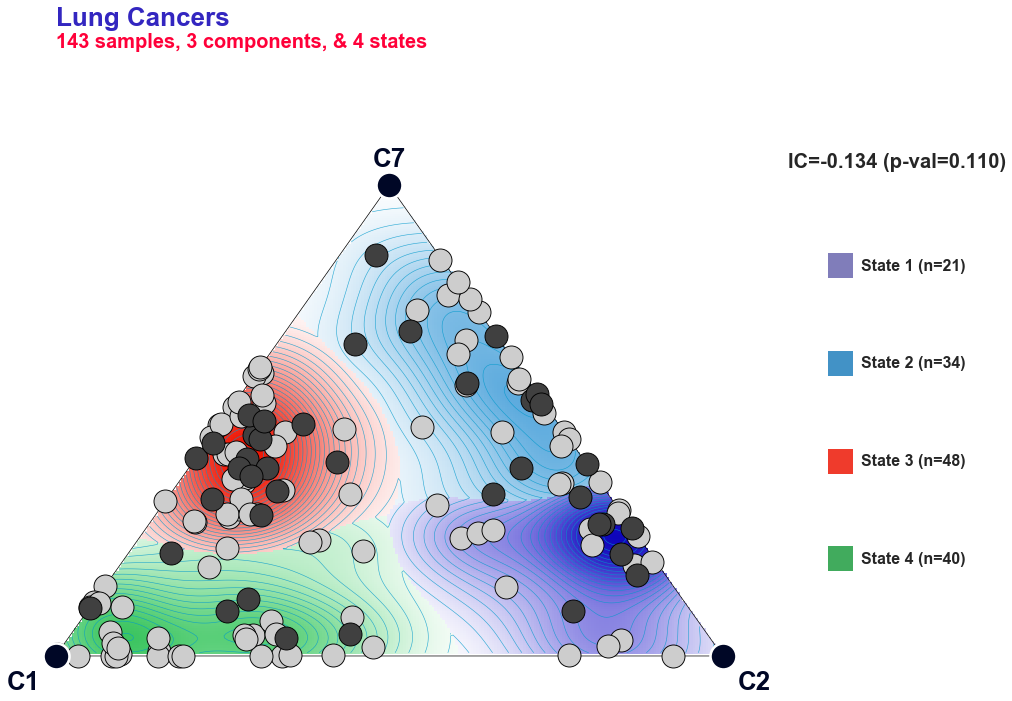

In [20]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=tissue_df.ix['lung', kras_h_matrix.columns],
                          title='Lung Cancers',
                          annotation_type='binary',  
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power = 1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for Lung Cancers (the bars indicate frequency of Lung Cancers in each state)

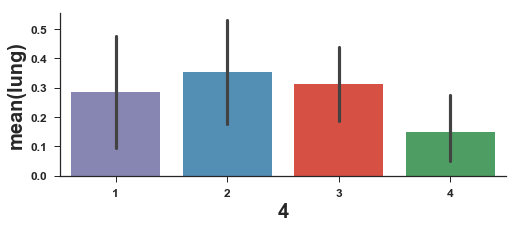

In [21]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            tissue_df.ix['lung', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for Colon Cancers  (black indicates the sample is a Colon Cancer, gray a different tissue type)

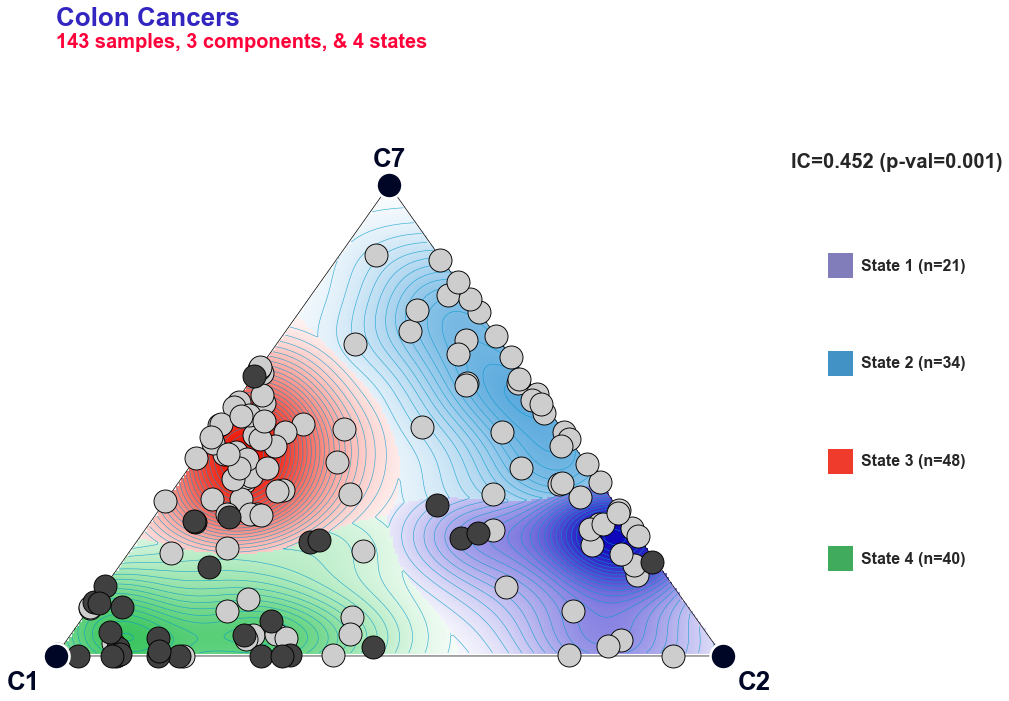

In [22]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=tissue_df.ix['large_intestine', kras_h_matrix.columns],
                          title='Colon Cancers',
                          annotation_type='binary',  
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for Colon Cancers (the bars indicate frequency of Colon Cancers in each state)

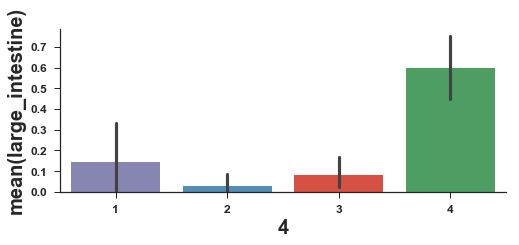

In [23]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            tissue_df.ix['large_intestine', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

#### 4.3. Display selected RTK gene expression features (these are part of Figs S9A-E in the article)

Onco-GPS for ERBB3 Expression (red indicates higher relative expression and blue lower relative expression)

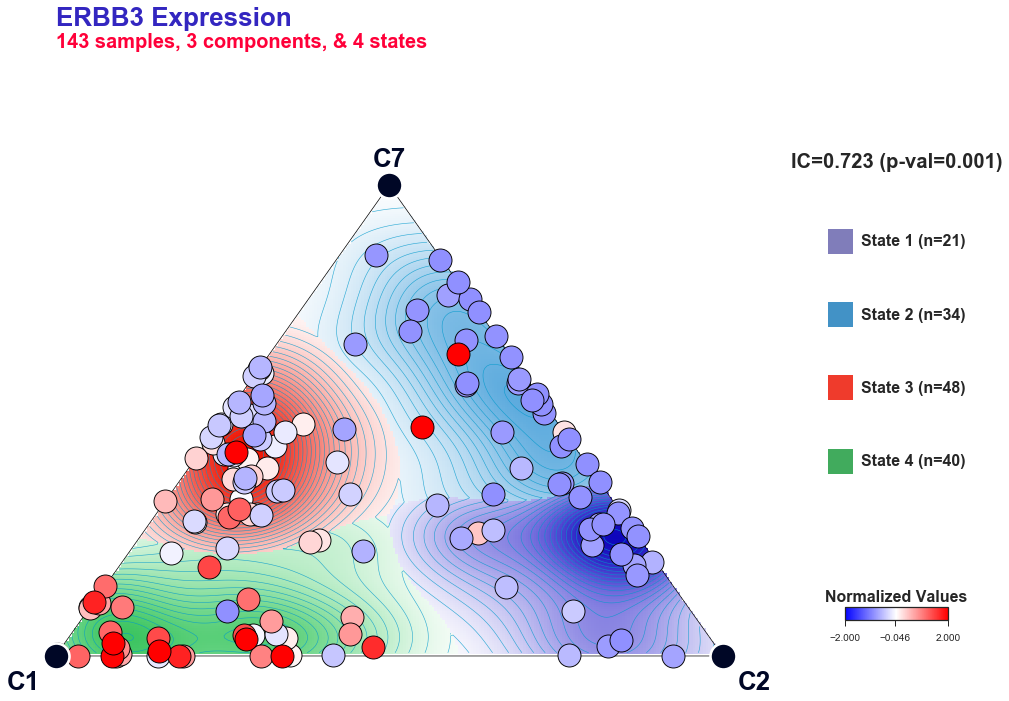

In [24]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_expression_df.ix['ERBB3', kras_h_matrix.columns],
                          title='ERBB3 Expression',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for ERBB3 Expression (higher values indicate higher relative expression)

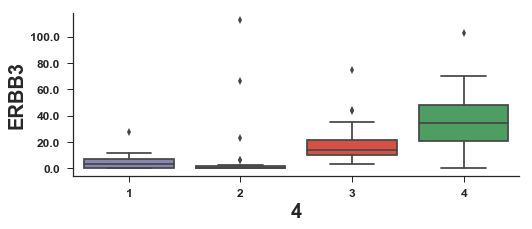

In [25]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_expression_df.ix['ERBB3', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for MET Expression (red indicates higher relative expression and blue lower relative expression)

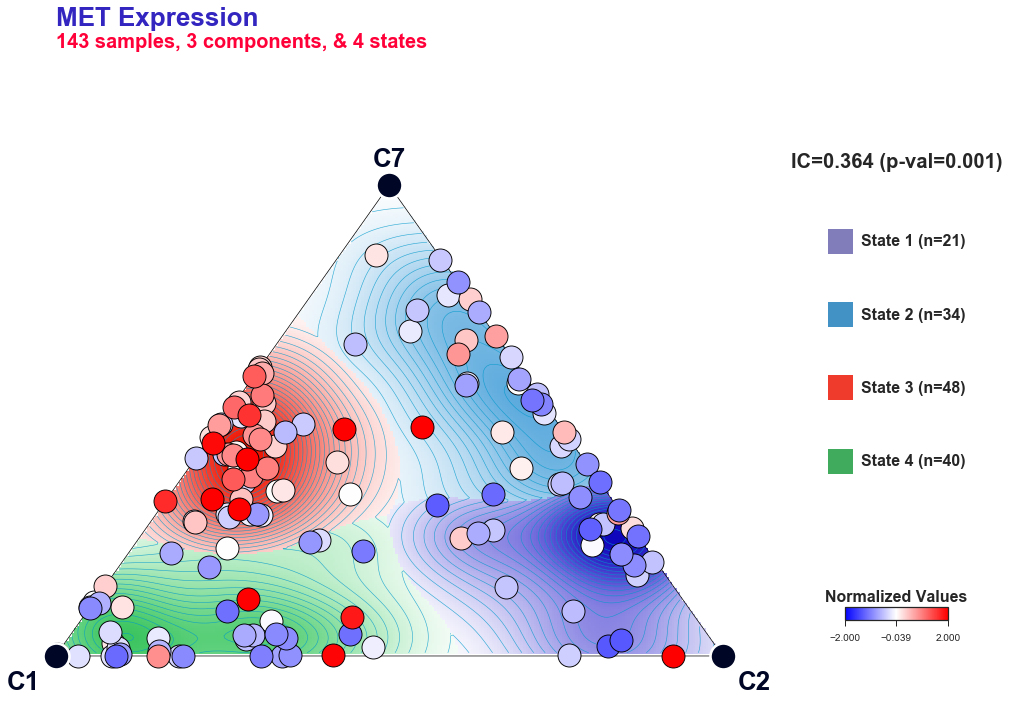

In [26]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_expression_df.ix['MET', kras_h_matrix.columns],
                          title='MET Expression',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for MET Expression (higher values indicate higher relative expression)

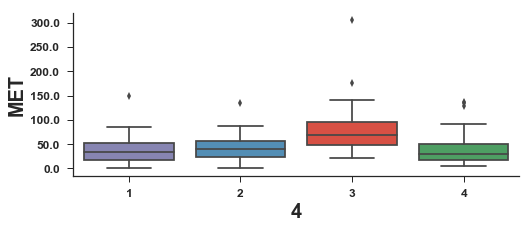

In [27]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_expression_df.ix['MET', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for EGFR Expression (red indicates higher relative expression and blue lower relative expression)

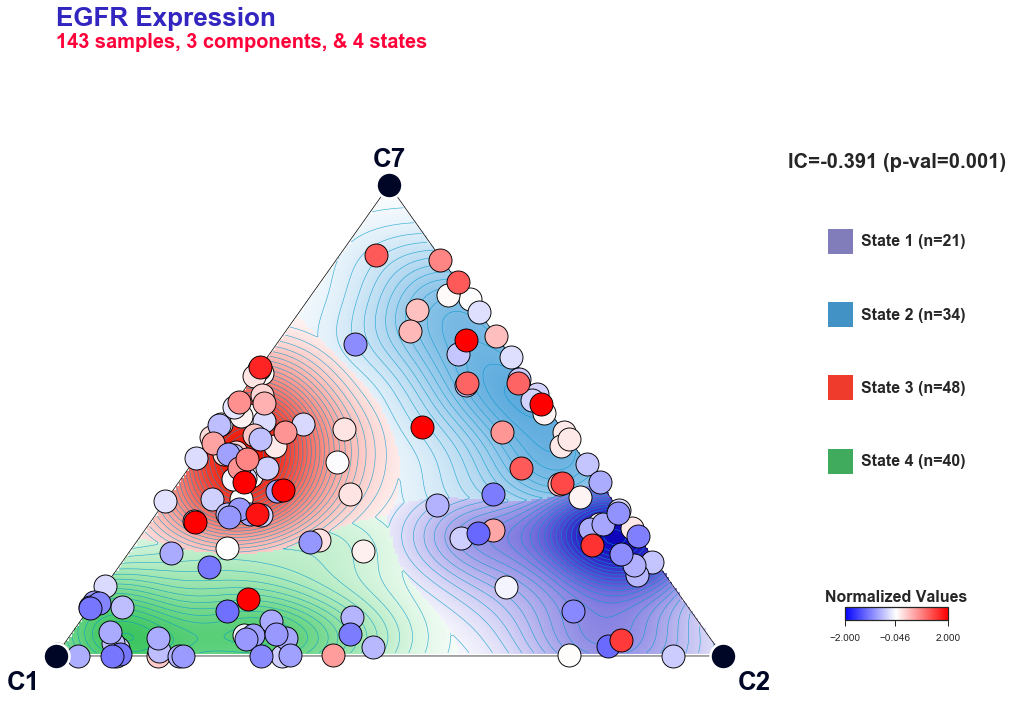

In [28]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_expression_df.ix['EGFR', kras_h_matrix.columns],
                          title='EGFR Expression',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for EGFR Expression (higher values indicate higher relative expression) 

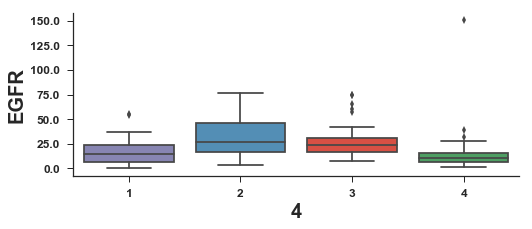

In [29]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                                                   gene_expression_df.ix['EGFR', kras_h_matrix.columns],
                                                   colors=[purple, blue, red, green],
                                                   violin_or_box='box', 
                                                   figure_size=(8, 3))

Boxplot for CD274 (PD-L1) Expression (red indicates higher relative expression and blue lower relative expression)

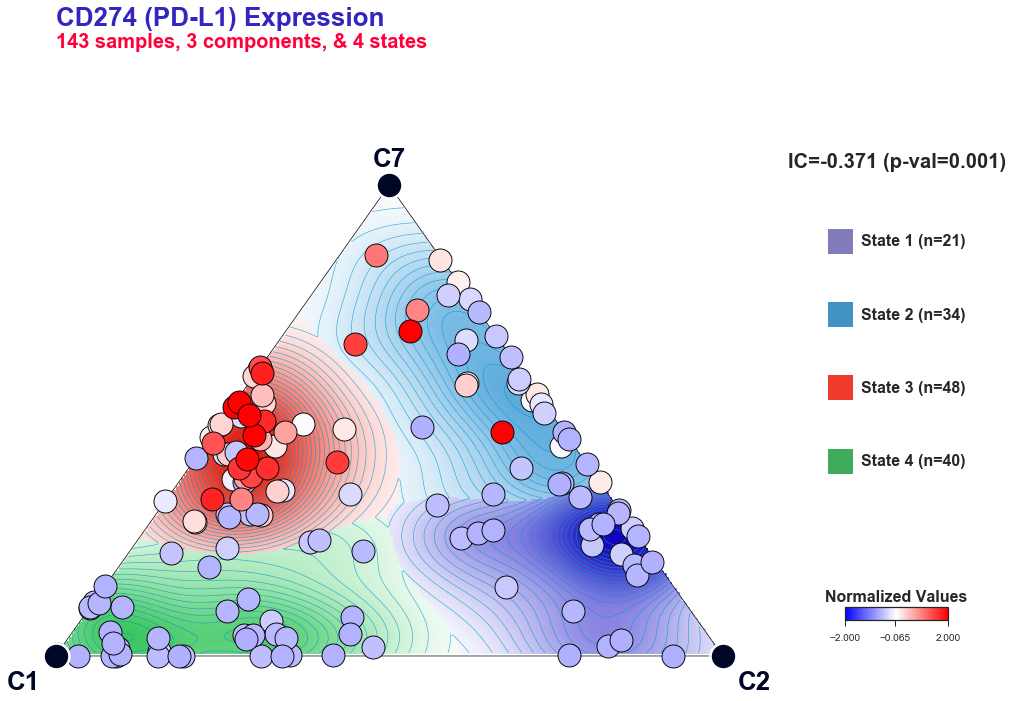

In [30]:
ccal.oncogps.make_oncogps(training_h=kras_h_matrix, 
                        training_states=kras_sample_labels, 
                        training_annotation=gene_expression_df.ix['CD274', kras_h_matrix.columns],
                        title='CD274 (PD-L1) Expression',
                        equilateral=True,
                        state_colors=[purple, blue, red, green],
                        power = 1.2,
                        kde_bandwidth_factor=0.75,
                        legend_markersize=25,
                        contour_linecolor=light_blue,
                        component_names=["C7","C2","C1"],
                        std_max=2)
                        #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))

Boxplot for CD274 (PD-L1) Expression (higher values indicate higher relative expression) 

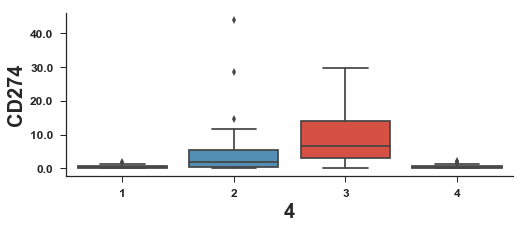

In [31]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_expression_df.ix['CD274', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

#### 4.4. Display selected protein expression features 

Onco-GPS for E-Cadherin Protein Expression (red indicates higher relative protein expression and blue lower relative expression)

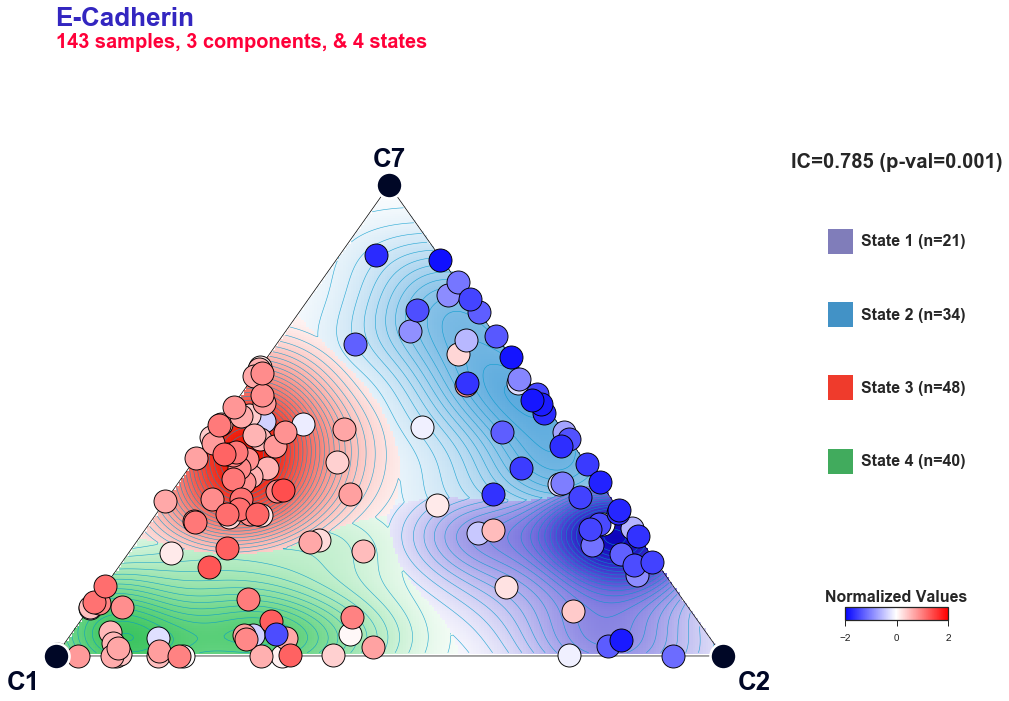

In [32]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=protein_expression_df.ix['E-Cadherin-R-V', kras_h_matrix.columns],
                          title='E-Cadherin',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))        

Boxplot for E-Cadherin Protein Expression  (higher values indicate higher relative protein expression) 

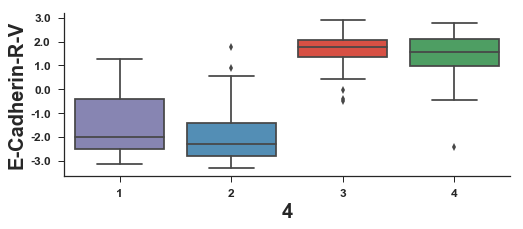

In [33]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            protein_expression_df.ix['E-Cadherin-R-V', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for HER3 Protein Expression (red indicates higher relative protein expression and blue lower relative expression)

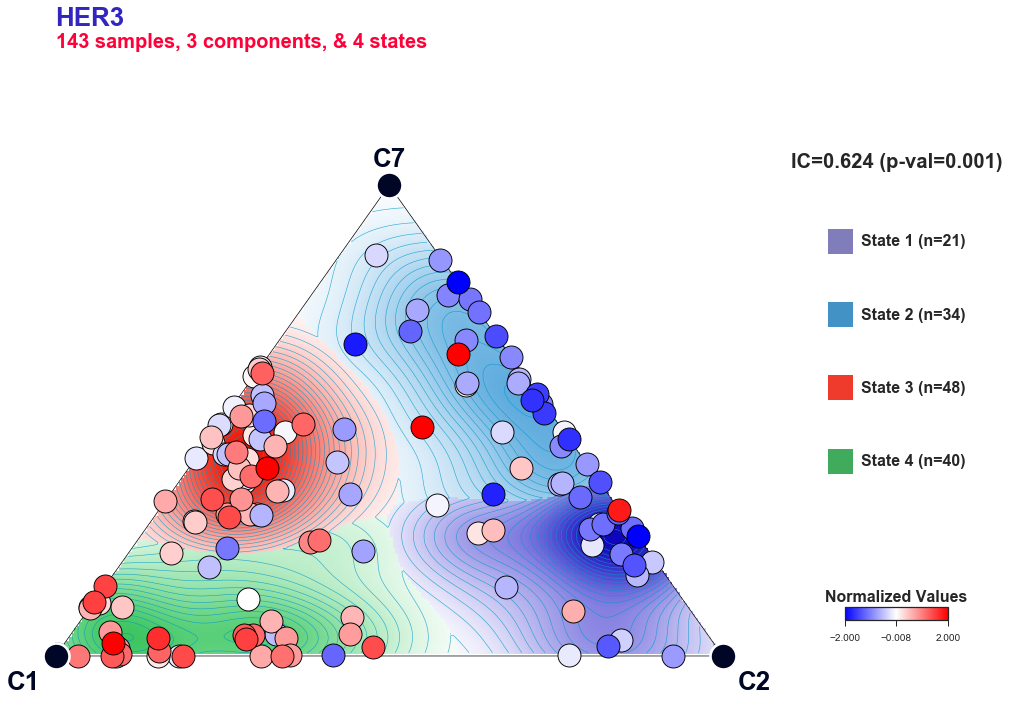

In [34]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=protein_expression_df.ix['HER3-R-V', kras_h_matrix.columns],
                          title='HER3',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))          

Boxplot for HER3 Protein Expression (higher values indicate higher relative protein expression) 

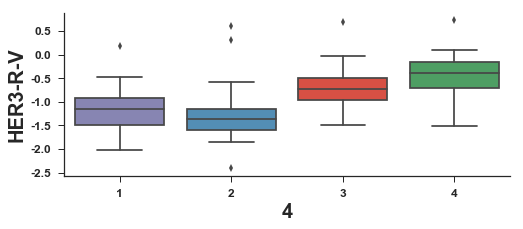

In [35]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                                                   protein_expression_df.ix['HER3-R-V', kras_h_matrix.columns],
                                                   colors=[purple, blue, red, green],
                                                   violin_or_box='box', 
                                                   figure_size=(8, 3))

#### 4.5. Display selected mutations

Onco-GPS for EGFR Mutations (black indicates the sample is EGFR mutant, gray wild type)

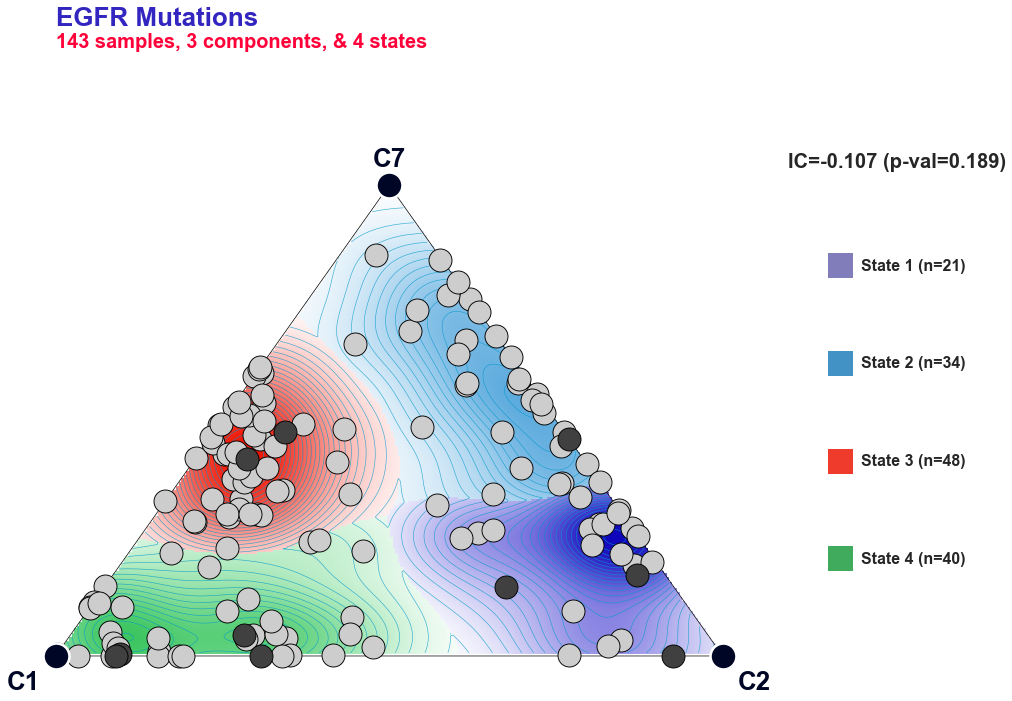

In [36]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=mutation_df.ix['EGFR_MUT', kras_h_matrix.columns],
                          title='EGFR Mutations',
                          annotation_type='binary',  
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for EGFR Mutations (the bars show frequency of EGFR mutations in each state)

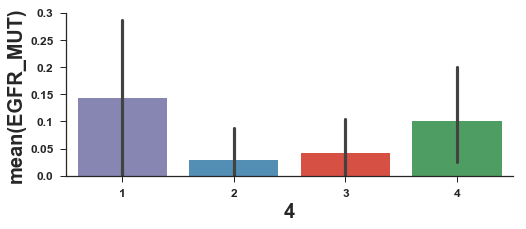

In [37]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                                                   mutation_df.ix['EGFR_MUT', kras_h_matrix.columns],
                                                   colors=[purple, blue, red, green],
                                                   violin_or_box='box', 
                                                   figure_size=(8, 3))

Onco-GPS for GNAS Mutations (black indicates the sample is GNAS mutant, gray wild type)

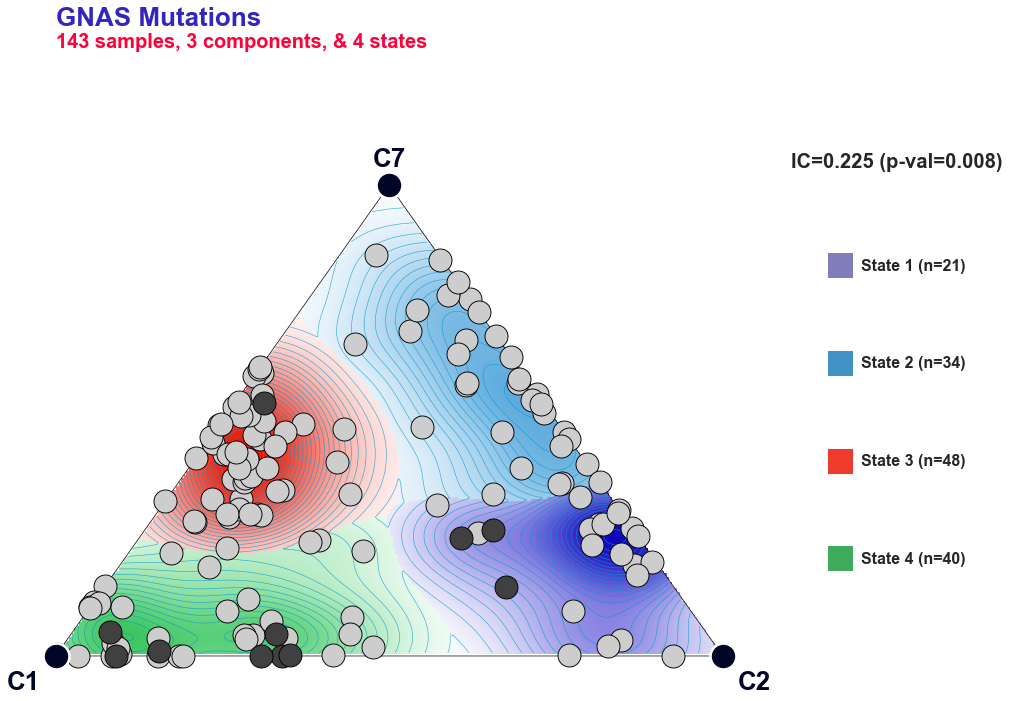

In [38]:
ccal.oncogps.make_oncogps(training_h=kras_h_matrix, 
                        training_states=kras_sample_labels, 
                        training_annotation=mutation_df.ix['GNAS_MUT', kras_h_matrix.columns],
                        title='GNAS Mutations',
                        annotation_type='binary',                          
                        equilateral=True,
                        state_colors=[purple, blue, red, green],
                        power = 1.2,
                        kde_bandwidth_factor=0.75,
                        legend_markersize=25,
                        contour_linecolor=light_blue,
                        component_names=["C7","C2","C1"],
                        std_max=2)
                        #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for GNAS Mutations (the bars show frequency of GNAS mutations in each state)

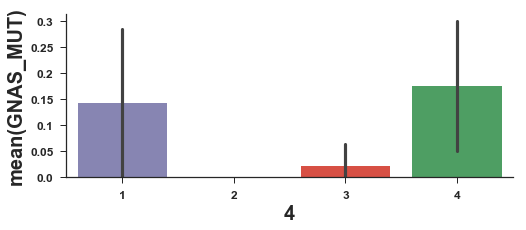

In [39]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            mutation_df.ix['GNAS_MUT', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

#### 4.6. Display selected RNAi gene dependencies 

Onco-GPS for Beta-Catenin Dependency  (blue indicates lower relative cell viability and red higher relative cell viability)

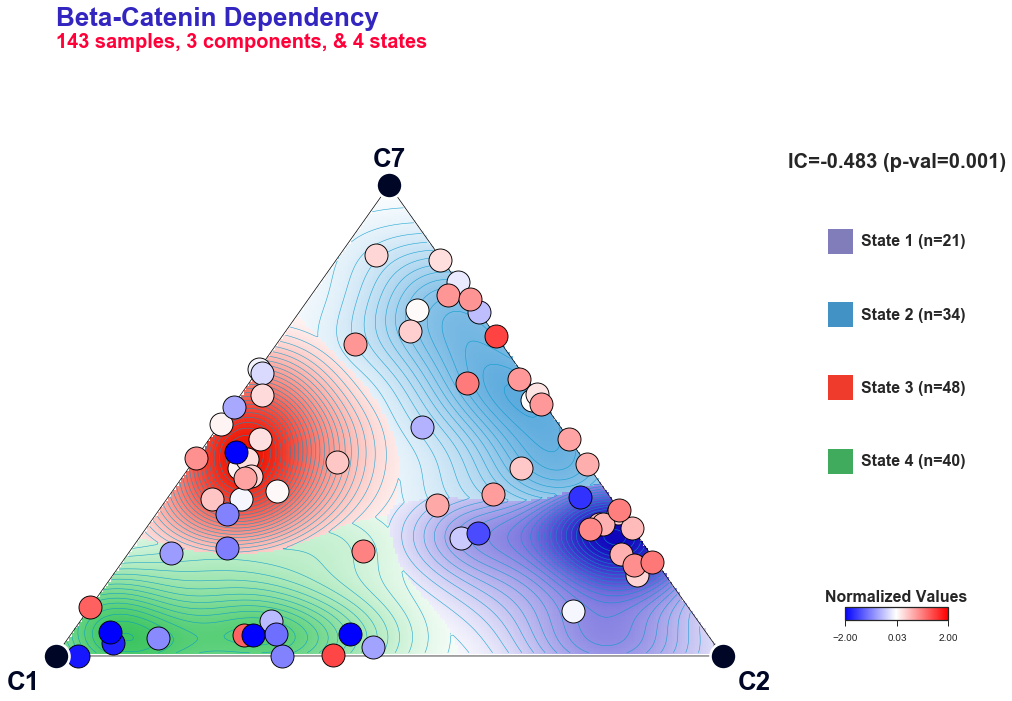

In [40]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_dependency_df.ix['CTNNB1', kras_h_matrix.columns],    
                          title='Beta-Catenin Dependency',
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for Beta-Catenin Dependency (lower values indicate lower relative cell viability)

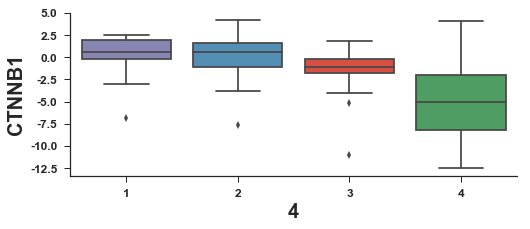

In [41]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_dependency_df.ix['CTNNB1', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for GNAS Dependency (blue indicates lower relative cell viability and red higher relative cell viability)

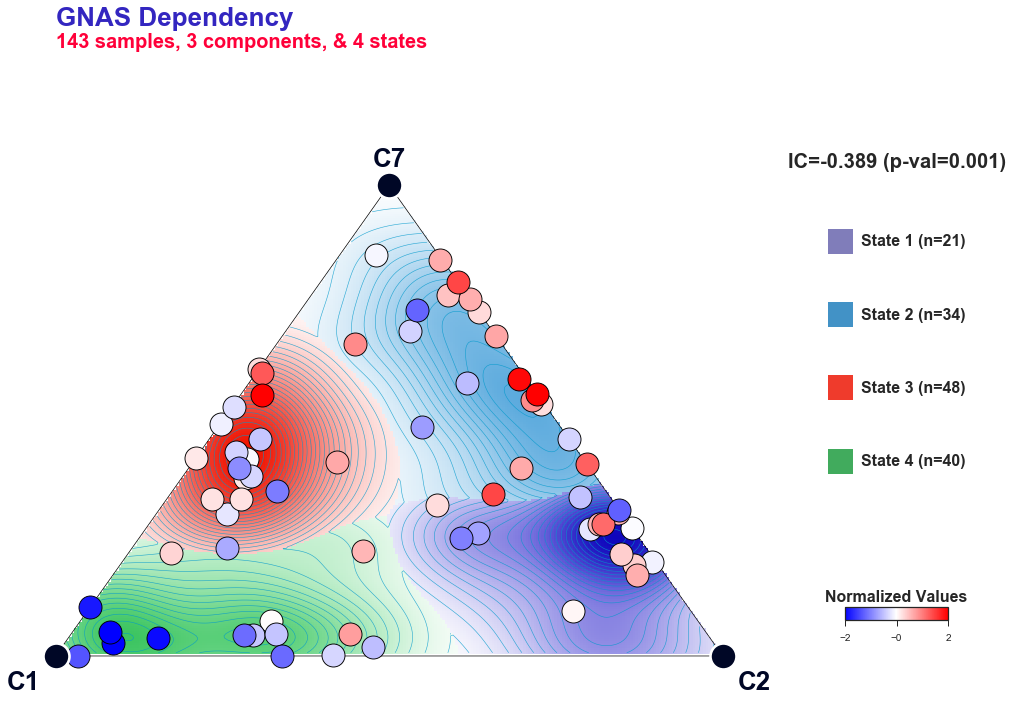

In [42]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_dependency_df.ix['GNAS', kras_h_matrix.columns],
                          title='GNAS Dependency',                       
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for GNAS Dependency (lower values indicate lower relative cell viability)

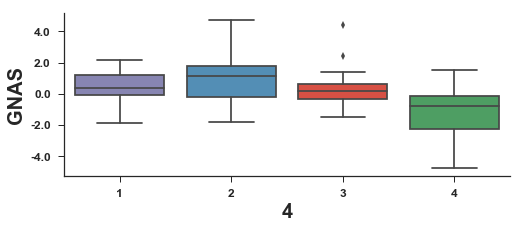

In [43]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_dependency_df.ix['GNAS', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for KRAS Dependency (blue indicates lower relative cell viability and red higher relative cell viability)

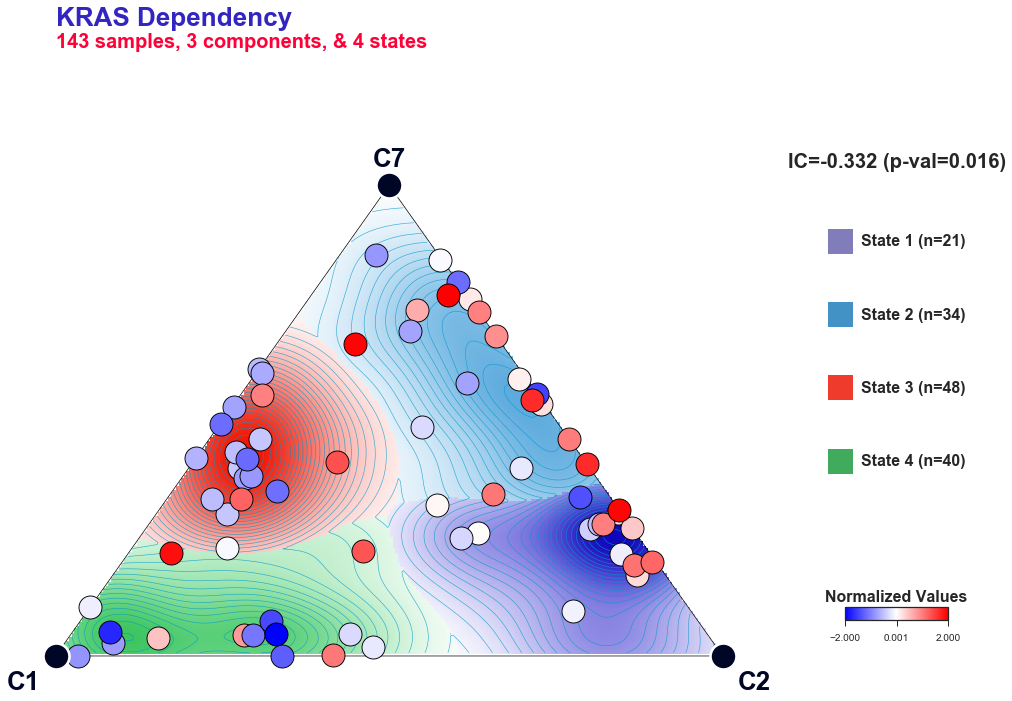

In [44]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=gene_dependency_df.ix['KRAS', kras_h_matrix.columns],
                          title='KRAS Dependency',                      
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power = 1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for KRAS Dependency (lower values indicate lower relative cell viability)

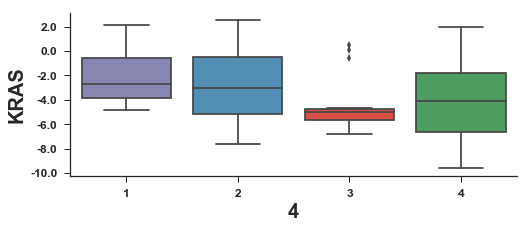

In [45]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            gene_dependency_df.ix['KRAS', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

#### 4.7. Display selected drug sensitivities

Onco-GPS for Avicin D Sensitivity (blue indicates higher relative sensitivity and red higher relative resistance)

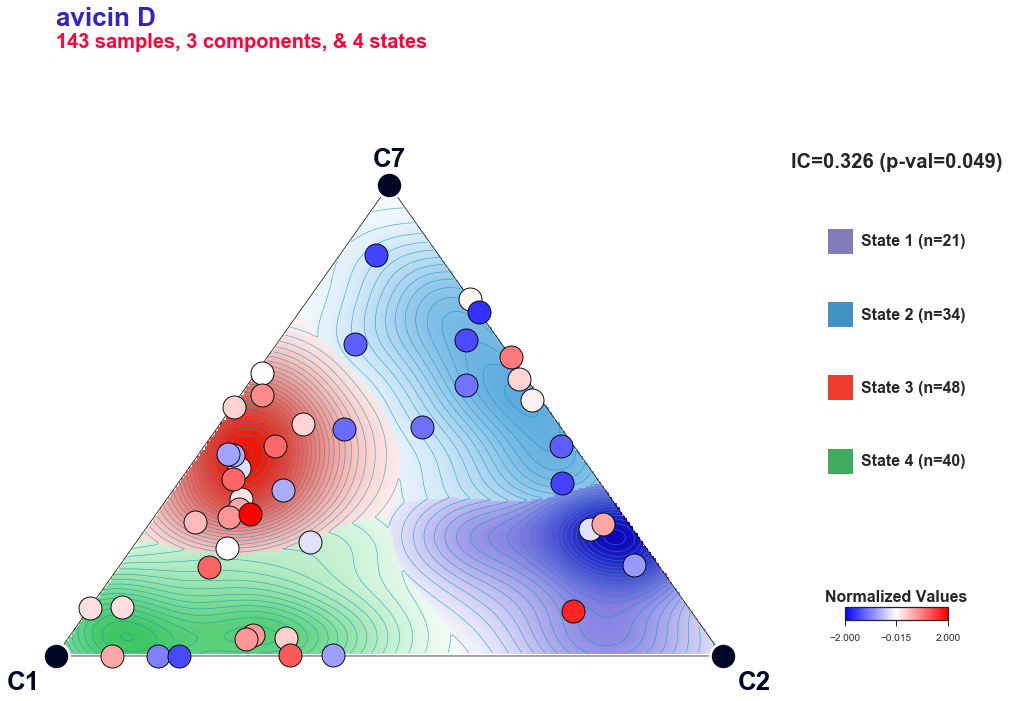

In [46]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=drug_sensitivity_df.ix['avicin D', kras_h_matrix.columns],
                          title='avicin D',                      
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for Avicin D Sensitivity (lower values indicate higher relative sensitivity)

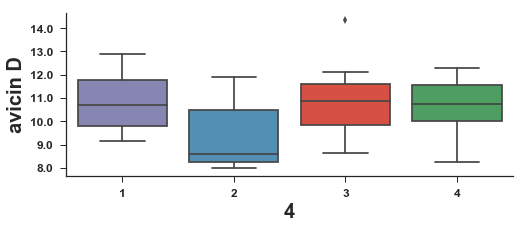

In [47]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            drug_sensitivity_df.ix['avicin D', kras_h_matrix.columns],
                            colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))

Onco-GPS for Niclosamide Sensitivity (blue indicates higher relative sensitivity and red higher relative resistance)

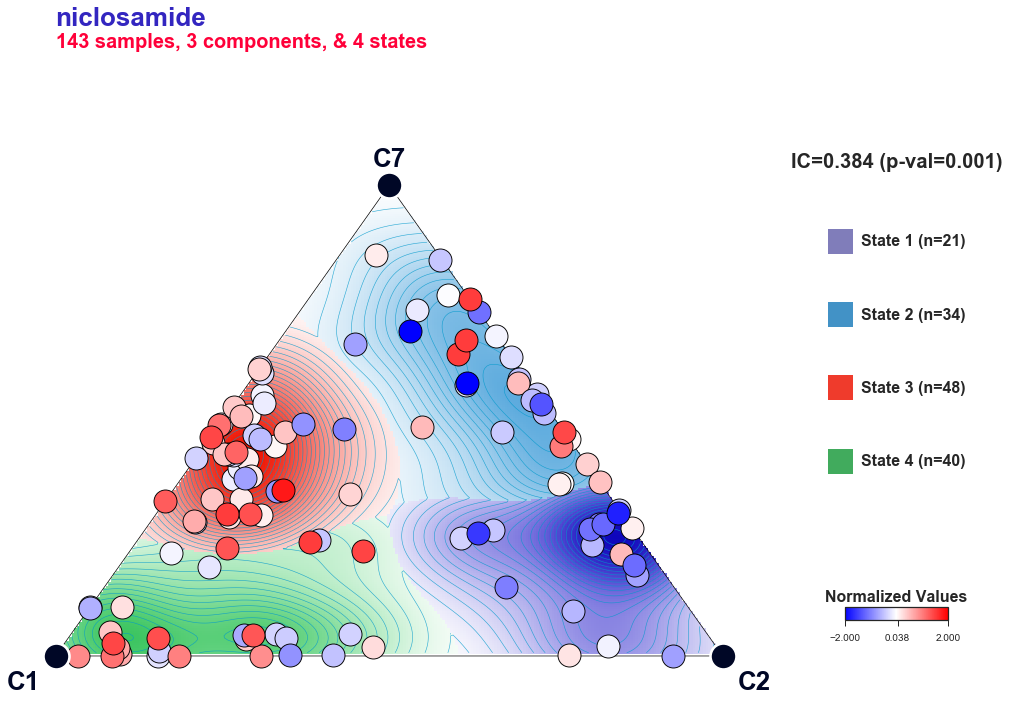

In [48]:
ccal.oncogps.make_oncogps(kras_h_matrix, 
                          kras_sample_labels, 
                          training_annotation=drug_sensitivity_df.ix['niclosamide', kras_h_matrix.columns],
                          title='niclosamide',                      
                          equilateral=True,
                          state_colors=[purple, blue, red, green],
                          power=1.2,
                          kde_bandwidth_factor=0.75,
                          legend_markersize=25,
                          contour_linecolor=light_blue,
                          component_names=["C7","C2","C1"],
                          std_max=2)
                          #filepath=join(DIR_RESULT, 'KRAS_Onco-GPS_Feature_{}.pdf'.format(annotation.name))  

Boxplot for Niclosamide (lower values indicate higher relative sensitivity)

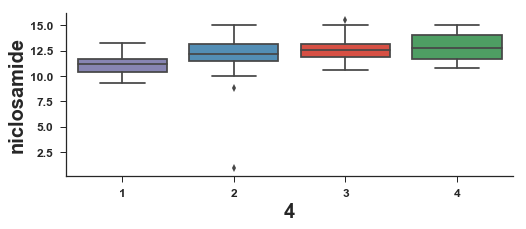

In [49]:
ccal.plot_violin_box_or_bar(kras_sample_labels, 
                            drug_sensitivity_df.ix['niclosamide', kras_h_matrix.columns], colors=[purple, blue, red, green],
                            violin_or_box='box', 
                            figure_size=(8, 3))